# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def feature_normalize(X):
    
    mean_values = []
    std_values = []
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_values.append(m)
        std_values.append(s)
        X_norm[:, i] = X[:, i] - m
        if s != 0:
            X_norm[:, i] /= s

    return X_norm, mean_values, std_values


def pca(X, k):
    X_norm, mean_values, std_values = feature_normalize(X)
    m = X.shape[0]
    sigma = 1. / m * (X_norm.T).dot(X_norm)
    U, S, V = np.linalg.svd(sigma)
    U_reduce = U[:, :k]
    z = X_norm.dot(U_reduce)
    X_restored = U_reduce.dot(z.T).T

    return X_norm, z, X_restored, mean_values, std_values



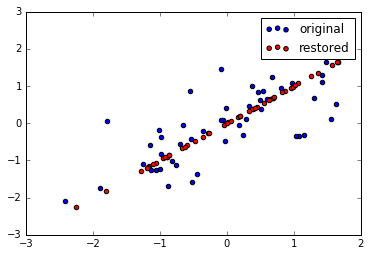

In [3]:
from scipy.io import loadmat

data = loadmat('ex7data1.mat')
X = data['X']
k = 1

X_norm, z, X_restored, mean_values, std_values = pca(X,k)

plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.scatter(X_restored[:, 0], X_restored[:, 1], c='r')
plt.legend(['original', 'restored'])
plt.show()


## PCA on faces

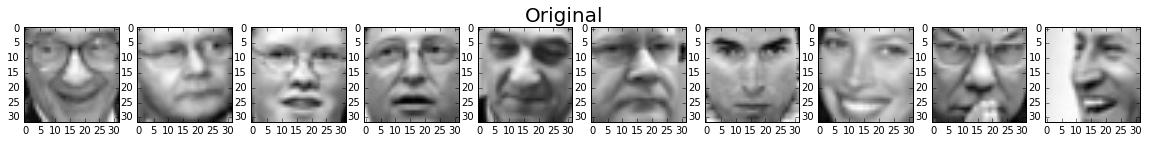

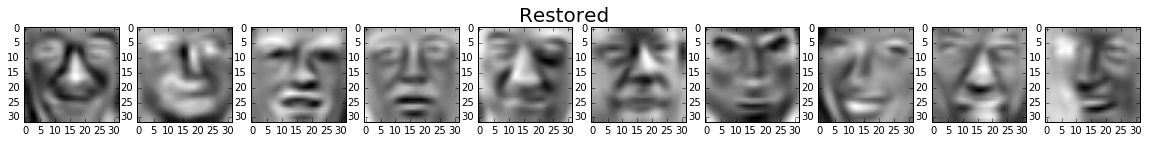

In [4]:
data = loadmat('ex7faces.mat')
X = data['X']

imgs = [X[i].reshape((32,32)).T for i in range (X.shape[0])]
fig = plt.figure(figsize=(20,2))
fig.suptitle("Original", fontsize=20)
for i,im in enumerate(imgs[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(im,cmap='gray')
plt.show()
    
k = 100
X_norm, z, X_restored, mean_values, std_values = pca(X,k)
imgs_restored = [X_restored[i].reshape((32,32)).T for i in range (X.shape[0])]
fig = plt.figure(figsize=(20,2))
fig.suptitle("Restored", fontsize=20)
for i,im in enumerate(imgs_restored[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(im,cmap='gray')
plt.show()
